In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [40]:
twogenres = pd.read_csv(os.path.join("classicandrapprimarygenres.csv"))
twogenres.head()

,ID,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,new_genres
0,3297,Britney Spears,0.156519,0.728706,223534.9358,0.762624,0.003121,0.222037,-4.966725,0.065950,114.956083,0.721743,56.871560,5,1,109,"['dance pop', 'pop', 'pop rap', 'post-teen pop']",rap
1,10647,JGRXXN,0.055570,0.608500,228249.5000,0.718000,0.132511,0.096100,-5.697000,0.165350,105.048500,0.130300,62.000000,10,0,4,"['atl trap', 'dark trap', 'phonk', 'undergroun...",rap
2,14103,Lil Pump,0.114460,0.831696,175930.8261,0.659087,0.000424,0.214222,-5.790174,0.177191,128.591565,0.531478,67.869565,10,1,23,"['emo rap', 'miami hip hop', 'rap', 'trap']",rap
3,17783,ODIE,0.611000,0.724500,169650.0000,0.459500,0.081629,0.098650,-9.681000,0.120600,92.214500,0.713500,67.000000,10,1,4,"['alternative r&b', 'indie r&b', 'trap soul']",rap
4,26877,Young Roddy,0.365000,0.555000,193735.0000,0.598000,0.000000,0.086500,-7.368000,0.314000,82.516000,0.650000,42.000000,10,0,1,"['new orleans rap', 'soul flow']",rap


In [42]:
twogenres.describe()

,ID,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,400.00000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,13778.61250,0.532988,0.519689,2.754850e+05,0.425496,0.266066,0.191518,-13.699293,0.119443,109.497047,0.390694,38.666542,5.127500,0.712500,24.135000
std,7892.75824,0.415971,0.224717,1.425801e+05,0.291297,0.358900,0.110841,8.525813,0.102895,21.382222,0.229626,22.412770,3.491665,0.453163,77.092346
min,71.00000,0.000030,0.070300,4.315567e+04,0.001100,0.000000,0.039900,-44.347000,0.026900,59.173000,0.031000,0.000000,0.000000,0.000000,1.000000
25%,7027.75000,0.107816,0.327949,1.991762e+05,0.146672,0.000009,0.113000,-19.629625,0.043123,95.679625,0.194750,23.375000,2.000000,0.000000,2.000000
50%,13947.50000,0.488000,0.516556,2.422951e+05,0.414950,0.012300,0.163784,-10.955214,0.065483,108.904482,0.389083,45.000000,5.000000,1.000000,4.000000
75%,20555.50000,0.965467,0.722991,2.944667e+05,0.681458,0.544829,0.231481,-6.267437,0.185750,123.672250,0.573844,56.000000,8.000000,1.000000,14.000000
max,27237.00000,0.995000,0.949000,1.534693e+06,0.974000,0.952000,0.820700,-1.472000,0.869250,177.056000,0.971000,77.687500,11.000000,1.000000,1061.000000


In [48]:
len(twogenres)

400

In [33]:
cleaned_data=twogenres.drop(["ID","artists","count","genres","popularity"],axis=1)
cleaned_data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,new_genres
0,0.156519,0.728706,223534.9358,0.762624,0.003121,0.222037,-4.966725,0.065950,114.956083,0.721743,5,1,rap
1,0.055570,0.608500,228249.5000,0.718000,0.132511,0.096100,-5.697000,0.165350,105.048500,0.130300,10,0,rap
2,0.114460,0.831696,175930.8261,0.659087,0.000424,0.214222,-5.790174,0.177191,128.591565,0.531478,10,1,rap
3,0.611000,0.724500,169650.0000,0.459500,0.081629,0.098650,-9.681000,0.120600,92.214500,0.713500,10,1,rap
4,0.365000,0.555000,193735.0000,0.598000,0.000000,0.086500,-7.368000,0.314000,82.516000,0.650000,10,0,rap


In [21]:
# assign x and y 
X = cleaned_data.drop("new_genres", axis =1)
y = cleaned_data['new_genres']
print(X.shape, y.shape)

(400, 12) (400,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [43]:
# trainin 75% of the data
len(X_train)

300

In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier

LogisticRegression(max_iter=1000)

In [24]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
print(classifier.score(X_train,y_train))
print(classifier.score(X_test,y_test))

0.9133333333333333
0.95


In [64]:
# new_data = np.array([[-2,6]])
# plt.scatter(X[:,0], X[:,1],c=y)
# plt.scatter(new_data[0,0], new_data[0,1],c='r', marker='o',s=100)
# plt.show()

In [26]:
predictions = classifier.predict(X_test)
print(f'first 10 predictions: {predictions[:10]}')
print(f' first 10 actual labels: {y_test[:10].tolist()}')

first 10 predictions: ['classical' 'rap' 'classical' 'classical' 'rap' 'classical' 'classical'
 'classical' 'rap' 'classical']
 first 10 actual labels: ['classical', 'rap', 'classical', 'classical', 'rap', 'classical', 'rap', 'classical', 'rap', 'classical']


In [28]:
pd.DataFrame({'prediction':predictions,'actual':y_test}).reset_index(drop=True)

,prediction,actual
0,classical,classical
1,rap,rap
2,classical,classical
3,classical,classical
4,rap,rap
...,...,...
95,classical,classical
96,classical,classical
97,classical,classical
98,classical,classical


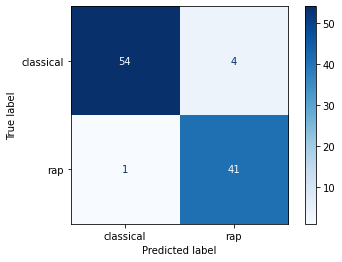

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [47]:
# check accuracy
(54 + 41) / (54 + 41 + 4 + 1)

0.95

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.95

In [35]:
# binary classification
from sklearn.metrics import classification_report 

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

   classical       0.98      0.93      0.96        58
         rap       0.91      0.98      0.94        42

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [58]:
# creating a random forest here. 

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.94

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.98

In [60]:
importances = rf.feature_importances_
importances

array([0.24160374, 0.14189416, 0.02039472, 0.21600008, 0.07931585,
       0.01409773, 0.16593181, 0.07538719, 0.01379168, 0.02216949,
       0.00719525, 0.0022183 ])

In [65]:
# the last 6 figures appear to be the least important of all features. could be
# useful to drop these?
sorted(zip(rf.feature_importances_, cleaned_data), reverse=True)

[(0.24160373692605688, 'acousticness'),
 (0.2160000848243436, 'energy'),
 (0.1659318135181825, 'loudness'),
 (0.1418941566101053, 'danceability'),
 (0.07931584729492568, 'instrumentalness'),
 (0.0753871859174818, 'speechiness'),
 (0.022169488797438852, 'valence'),
 (0.020394723719716193, 'duration_ms'),
 (0.014097725028073648, 'liveness'),
 (0.013791681994841494, 'tempo'),
 (0.0071952549769377224, 'key'),
 (0.0022183003918964423, 'mode')]

In [ ]:
# attempting the logistical regression model for 10 models here.